In [68]:
import pandas as pd

Adatok betöltése

In [7]:
df = pd.read_excel('2024.xlsx')

In [8]:
df1 = pd.read_csv('2023.csv')
df2 = pd.read_csv('2022.csv')

2023, 2022-es évekre az adatok transzponálása, index kicserélése, oszlopok nagybetűsítése, csapatnevek nagybetűsítése


In [9]:
df1d = df1.set_index('Unnamed: 0').T.reset_index()
df1d = df1d.rename(columns={'index':'CSAPATNÉV'})
df1d.columns = df1d.columns.str.upper()
df1d['CSAPATNÉV'] = df1d['CSAPATNÉV'].str.upper()

In [10]:
df2d = df2.set_index('Unnamed: 0').T.reset_index()
df2d = df2d.rename(columns={'index':'CSAPATNÉV'})
df2d.columns = df2d.columns.str.upper()
df2d['CSAPATNÉV'] = df2d['CSAPATNÉV'].str.upper()

In [11]:
df['CSAPATNÉV'] = df['CSAPATNÉV'].str.upper()

In [14]:
df

,CSAPATNÉV,ÖSSZESEN,ASZTALITENISZ,BEER-PONG,BEMUTATKOZÓ,BILIÁRD,BOGRÁCS,BOLC,CHANDELIER,CHEST - PONG,...,PC:LOL,PÓKER,RÖPI,SAKK,SLAM,STAFÉTA,SZEMÉTSZEDÉS,TÁBLÉ,TÁNCMARATON,ÚSZÁS
0,S'TUDJA,5608,140,80,318,45,198,150,30,215,...,150,120,200,45,60,170,100,90,349,116
1,GENITÁLIA,5488,180,50,332,75,211,155,155,90,...,10,40,45,160,60,140,100,60,350,138
2,UNI-GUNS,5277,120,140,333,60,228,140,200,70,...,150,30,200,60,60,136,100,45,350,92
3,SÖRNYETEGEK,4907,65,260,244,75,154,105,60,180,...,75,70,130,60,60,112,100,0,342,126
4,SHAKESBEER,4898,95,50,288,45,196,28,30,50,...,150,70,200,45,60,120,100,75,343,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,COLABORÉSÖN,3007,50,50,238,45,60,29,70,50,...,30,30,95,45,60,50,100,45,331,62
60,DIAKNAPOS CSAPAT,3004,50,50,81,60,77,29,40,50,...,30,40,45,45,60,66,100,45,299,82
61,LEMONARCHIA,2733,50,50,0,160,0,100,60,70,...,100,40,45,45,60,0,100,45,346,0
62,BARÁTOCOOL,2689,65,50,263,45,0,26,50,70,...,30,40,45,0,60,0,100,90,0,56


2024-es adatsorban csapatnevek elválasztása az előtte levő számoktól

In [13]:
df['CSAPATNÉV'] = df['CSAPATNÉV'].str.replace(r'^\d+\.\s*', '', regex=True)

Az oszlopok neveit évenként betesszük egy külön listába

In [15]:
c = df.columns.tolist()
c1 = df1d.columns.tolist()
c2 = df2d.columns.tolist()

Egyesítjük ezeket a listákat egybe, úgy hogy közbe kiszűrjük azokat, ami mindenikben megjelenik, ez lesz a matching

In [16]:
matching = set(c).intersection(c1).intersection(c2)

In [17]:
matching

{'ASZTALITENISZ',
 'BEER-PONG',
 'BEMUTATKOZÓ',
 'BILIÁRD',
 'BOGRÁCS',
 'BOLC',
 'CHANDELIER',
 'CITY TOUR',
 'COOLTÚRA',
 'CSAPATNÉV',
 'CSOCSÓ',
 'DANCE BATTLE',
 'EROTIK',
 'FOTÓMARATON',
 'FÉRFI FOCI',
 'JENGA',
 'KARAOKE',
 'KLÁN-TOUR',
 'KLÁN-TOUR NIGHT',
 'KOSÁRLABDA',
 'KULTÚRMARATON',
 'KÉZILABDA',
 'MÉTA',
 'NÉPTÁNC',
 'NŐI FOCI',
 'PÓKER',
 'SAKK',
 'STAFÉTA',
 'TÁBLÉ',
 'TÁNCMARATON',
 'ÖSSZESEN',
 'ÚSZÁS'}

Megnézzük, mindenikre külön, hogy milyen nevek nincsenek benne a matcingbe, ezt eltároljuk

In [18]:
nomatch = set(c) - set(matching)
nomatch1 = set(c1) - set(matching)
nomatch2 = set(c2) - set(matching)

In [19]:
nomatch

{'CHEST - PONG', 'PC:CS 2', 'PC:LOL', 'RÖPI', 'SLAM', 'SZEMÉTSZEDÉS'}

In [20]:
nomatch1

{'CHEST-PONG', 'CS:GO', 'LOL', 'RÖPLABDA', 'SLAM POETRY'}

In [21]:
nomatch2

{'CHEST-PONG', 'CS:GO', 'LOL', 'RÖPI', 'SLAM'}

Versenyszámok nevének kicserélése

In [22]:
df.rename(columns={'CHEST - PONG':'CHEST-PONG'}, inplace=True)
df.rename(columns={'PC:CS 2':'CS:GO'}, inplace=True)
df1d.rename(columns={'RÖPLABDA':'RÖPI'}, inplace=True)
df.rename(columns={'PC:LOL':'LOL'}, inplace=True)
df1d.rename(columns={'SLAM POETRY':'SLAM'}, inplace=True)

In [23]:
c = df.columns.tolist()
c1 = df1d.columns.tolist()
c2 = df2d.columns.tolist()

In [24]:
matching = set(c).intersection(c1).intersection(c2)
nomatch = set(c) - set(matching)
nomatch1 = set(c1) - set(matching)
nomatch2 = set(c2) - set(matching)


In [25]:
nomatch

{'SZEMÉTSZEDÉS'}

In [26]:
nomatch1

set()

In [27]:
nomatch2

set()

a szemétszedés oszlop eltávolítása és kivonása

In [28]:
df['ÖSSZESEN'] = df['ÖSSZESEN'] - df['SZEMÉTSZEDÉS']

In [29]:
df.drop(columns=['SZEMÉTSZEDÉS'], inplace=True)

csapatnevek különbségei a 3 év alatt

In [30]:
teams = set(df['CSAPATNÉV'])
teams1 = set(df1d['CSAPATNÉV'])
teams2 = set(df2d['CSAPATNÉV'])

In [31]:
matching_teams = teams.intersection(teams1).intersection(teams2)

In [32]:
matching_teams

{'A KOCKA MÁSIK OLDALA',
 'AMITAKARTOK',
 'BASSZHATTYÚK',
 'BEER-KA',
 'BEERLUCK',
 'BEEZ-MUTE',
 'BORÁSZOK',
 'BÚVÁRMEDVÉK',
 'CHEEKLOW',
 'CHEEKY-SHARE',
 'CUM WITH US',
 'DIAKNAPOS CSAPAT',
 "DRUNKIN' DONUTS",
 'FUCKTÚRA',
 'GENITÁLIA',
 'IGNORE',
 'IN-TEAM',
 'K.O.SER',
 'MAGYAR SZISZTEM',
 'ME OF US ONE',
 'MOZGÉKONYAK',
 'ROXTARROK',
 'RÁMSZESZ',
 'SHAKESBEER',
 'SZERVEZTEM',
 'SZESCOBAR',
 'SZESZKIMÓK',
 'SÖRÖS-TERV',
 'UNI-GUNS',
 'VERBUNK',
 'VÁ$ÖRHELY',
 'WATTAFÁK',
 'WEEDRÁK',
 'WESITHEK',
 'WHATSON',
 'ZSÁKMÁNY',
 'Ű-BEER'}

In [33]:
no_match_team = teams - matching_teams
no_match_team1 = teams1 - matching_teams
no_match_team2 = teams2 - matching_teams

In [34]:
no_match_team

{".S!C'R",
 'ABSZOLÚT',
 'ANYUKÁD KEDVENC CSAPATA',
 'ART-ISZTOK',
 'BARÁTOCOOL',
 'BIOLORGIA',
 'BULI-GUNS',
 'COLABORÉSÖN',
 'DURGOLAX',
 'ETILALAKULAT',
 'FEHÉRLÓPHIA',
 'FRÖCCSÖGÖK',
 'HUPIKÉK SÖRIKÉK',
 'HÖKÖL',
 'KOMA-SZUTRA',
 'KOMLÓSHOCK',
 'LEMONARCHIA',
 'MAD DOGS',
 'MEGBORULUNK',
 'MURATURA',
 'N@FING',
 'PUSSYLVA',
 "S'TUDJA",
 'STROHGEREK',
 'SÖRNYETEGEK',
 'TEQUILA TIGRISEK',
 'VÁ$ÖRHELYOLÉÉÉ'}

In [35]:
no_match_team1

{".S!C'R",
 'ABSZOLÚT',
 'BARÁTOCOOL',
 'BIOLORGIA',
 'COLABORÉSÖN',
 'DURGOLAX',
 'ETILALAKULAT',
 'FEHÉRLÓPHIA',
 'FRÖCCSÖGÖK',
 'GINSTABIL',
 'HÖKÖL',
 'KOMA-SZUTRA',
 'LEMONARCHIA',
 'MAD DOGS',
 'MEGBORULUNK',
 'MURATÚRA',
 'N@FING',
 'POPÓLOPÓK',
 'PRODUCKTIVE',
 'STROHGEREK',
 'SZESZESÚJVÁR',
 'SZŰRT',
 'SÖRNYETEGEK',
 'VANSÖR',
 'VÁ$ÖRH\x80LYOLÉÉÉ'}

In [36]:
no_match_team2

{'ANTI-BIUNICUM',
 'ANYUKÁD KEDVENC CSAPATA',
 'DEVASTATION',
 'FEHÉRLÓPIA',
 'JAZZEMEG',
 'KÓMA-SZUTRA',
 'MURATÚRA',
 'POPÓLOPÓK',
 'QUASALO',
 "S'TUDJA",
 'SZESZESÚJVÁR',
 'SZŰRT',
 'VANSÖR',
 '‘CUZGÁZ'}

egyesítjük egy táblázatba a csapatokat, majd manuálisan rendezzük

In [37]:
teamsek = pd.DataFrame(teams)
teamsek = teamsek.rename(columns={0:2024})
teams1a=list(teams1) + list(range(2))
teams2a=list(teams2) + list(range(13))

teamsek[2023]=teams1a
teamsek[2022]=teams2a
teamsek.to_excel('teams.xlsx')

In [38]:
teams_jo=pd.read_excel('teams_javitott.xlsx').drop('Unnamed: 0', axis=1)

In [39]:
teams_jo

,CSAPAT,2024,2023,2022
0,‘CUZGÁZ,NaN,NaN,‘CUZGÁZ
1,.S!C'R,.S!C'R,.S!C'R,NaN
2,A KOCKA MÁSIK OLDALA,A KOCKA MÁSIK OLDALA,A KOCKA MÁSIK OLDALA,A KOCKA MÁSIK OLDALA
3,ABSZOLÚT,ABSZOLÚT,ABSZOLÚT,NaN
4,AMITAKARTOK,AMITAKARTOK,AMITAKARTOK,AMITAKARTOK
...,...,...,...,...
69,WATTAFÁK,WATTAFÁK,WATTAFÁK,WATTAFÁK
70,WEEDRÁK,WEEDRÁK,WEEDRÁK,WEEDRÁK
71,WESITHEK,WESITHEK,WESITHEK,WESITHEK
72,WHATSON,WHATSON,WHATSON,WHATSON


javítjuk a csapatneveket a standardra

In [40]:
df['CSAPATNÉV'] = df['CSAPATNÉV'].replace(teams_jo.set_index(2024)['CSAPAT'])
df1d['CSAPATNÉV'] = df1d['CSAPATNÉV'].replace(teams_jo.set_index(2023)['CSAPAT'])
df2d['CSAPATNÉV'] = df2d['CSAPATNÉV'].replace(teams_jo.set_index(2022)['CSAPAT'])

In [41]:
teams = set(df['CSAPATNÉV'])
teams2 = set(df2d['CSAPATNÉV'])
teams1 = set(df1d['CSAPATNÉV'])

matching_teams = teams.intersection(teams2).intersection(teams1)

beszurjuk az ev oszlopot

In [42]:
df2d['ÉV'] = 2022
df1d['ÉV'] = 2023
df['ÉV'] = 2024

# Összesítés (3 év)
df_combined = pd.concat([df2d, df1d, df])

szűrjük az szerint, hogy létezzen minden évben a csapatnév

In [43]:
df_jo = df_combined[ df_combined['CSAPATNÉV'].isin(matching_teams) ]

In [44]:
df_jo.to_excel('dolgozni.xlsx')

In [59]:
df_jo

,CSAPATNÉV,ASZTALITENISZ,BEER-PONG,BEMUTATKOZÓ,BILIÁRD,BOGRÁCS,BOLC,CHANDELIER,CHEST-PONG,CITY TOUR,...,PÓKER,RÖPI,SAKK,SLAM,STAFÉTA,TÁBLÉ,TÁNCMARATON,ÚSZÁS,ÖSSZESEN,ÉV
0,ZSÁKMÁNY,25,90,128,20,106,155,60,50,247,...,25,50,40,177,122,30,342,102,3644,2022
1,WHATSON,50,170,120,30,85,46,70,90,147,...,30,70,40,145,58,50,171,72,3180,2022
2,WESITHEK,50,50,75,30,90,75,180,130,153,...,70,50,50,177,80,90,345,0,3573,2022
3,WEEDRÁK,25,50,225,100,93,44,50,50,116,...,90,70,30,112,92,40,325,140,3328,2022
4,WATTAFÁK,75,90,208,20,98,40,30,50,246,...,60,70,30,172,110,40,335,70,3662,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,AMITAKARTOK,50,50,167,45,104,0,60,50,170,...,20,165,45,100,0,60,350,140,3113,2024
56,ROXTARROK,50,80,154,45,105,32,80,70,117,...,40,45,45,60,128,45,342,0,3071,2024
57,IGNORE,50,50,188,130,93,36,70,50,167,...,60,45,60,60,62,45,350,64,3053,2024
60,DIAKNAPOS CSAPAT,50,50,81,60,77,29,40,50,53,...,40,45,45,60,66,45,299,82,2904,2024


készítek egy egy külön táblázatot minden napra az adott nap versenyeivel és pontszámával, innen számolok minden napra, csapatonként összegyűjtött pontszámot, minden evre kulon

In [64]:
df_2022 = df_jo[df_jo['ÉV'] == 2022]
df_2023 = df_jo[df_jo['ÉV'] == 2023]
df_2024 = df_jo[df_jo['ÉV'] == 2024]

In [46]:
szerda = ['BEMUTATKOZÓ']
csutortok = ['KLÁN-TOUR', 'MÉTA', 'KOSÁRLABDA', 'ÚSZÁS', 'TÁBLÉ', 'PÓKER', 'CHEST-PONG', 'NÉPTÁNC', 'BILIÁRD', 'DANCE BATTLE', 'KARAOKE']
pentek = ['STAFÉTA', 'CS:GO', 'TÁNCMARATON', 'CHANDELIER', 'BEER-PONG', 'CITY TOUR', 'ASZTALITENISZ', 'JENGA', 'COOLTÚRA', 'SLAM']
szombat = ['FÉRFI FOCI', 'LOL', 'KÉZILABDA', 'RÖPI', 'KULTÚRMARATON', 'CSOCSÓ', 'SAKK', 'NŐI FOCI', 'KLÁN-TOUR NIGHT', 'BOLC']
vasarnap = ['BOGRÁCS', 'EROTIK']

In [66]:
df_szombat22 = df_2022.groupby(["CSAPATNÉV"])[szombat].sum()
df_szerda22 = df_2022.groupby(["CSAPATNÉV"])[szerda].sum()
df_csutortok22 = df_2022.groupby(["CSAPATNÉV"])[csutortok].sum()
df_pentek22 = df_2022.groupby(["CSAPATNÉV"])[pentek].sum()
df_vasarnap22 = df_2022.groupby(["CSAPATNÉV"])[vasarnap].sum()

In [76]:
df_szombat23 = df_2023.groupby(["CSAPATNÉV"])[szombat].sum()
df_szerda23= df_2023.groupby(["CSAPATNÉV"])[szerda].sum()
df_csutortok23 = df_2023.groupby(["CSAPATNÉV"])[csutortok].sum()
df_pentek23 = df_2023.groupby(["CSAPATNÉV"])[pentek].sum()
df_vasarnap23 = df_2023.groupby(["CSAPATNÉV"])[vasarnap].sum()

In [77]:
df_szombat24 = df_2024.groupby(["CSAPATNÉV"])[szombat].sum()
df_szerda24 = df_2024.groupby(["CSAPATNÉV"])[szerda].sum()
df_csutortok24 = df_2024.groupby(["CSAPATNÉV"])[csutortok].sum()
df_pentek24 = df_2024.groupby(["CSAPATNÉV"])[pentek].sum()
df_vasarnap24 = df_2024.groupby(["CSAPATNÉV"])[vasarnap].sum()

In [68]:
df_szombat22['ÖSSZSZOMBAT'] = df_szombat22.sum(axis=1)
df_szerda22['ÖSSZSZERDA'] = df_szerda22.sum(axis=1)
df_pentek22['ÖSSZPÉNTEK'] = df_pentek22.sum(axis=1)
df_csutortok22['ÖSSZCSÜT'] = df_csutortok22.sum(axis=1)
df_vasarnap22['ÖSSZVASÁRNAP'] = df_vasarnap22.sum(axis=1)

In [78]:
df_szombat23['ÖSSZSZOMBAT'] = df_szombat23.sum(axis=1)
df_szerda23['ÖSSZSZERDA'] = df_szerda23.sum(axis=1)
df_pentek23['ÖSSZPÉNTEK'] = df_pentek23.sum(axis=1)
df_csutortok23['ÖSSZCSÜT'] = df_csutortok23.sum(axis=1)
df_vasarnap23['ÖSSZVASÁRNAP'] = df_vasarnap23.sum(axis=1)

In [79]:
df_szombat24['ÖSSZSZOMBAT'] = df_szombat24.sum(axis=1)
df_szerda24['ÖSSZSZERDA'] = df_szerda24.sum(axis=1)
df_pentek24['ÖSSZPÉNTEK'] = df_pentek24.sum(axis=1)
df_csutortok24['ÖSSZCSÜT'] = df_csutortok24.sum(axis=1)
df_vasarnap24['ÖSSZVASÁRNAP'] = df_vasarnap24.sum(axis=1)

In [71]:
df_szombat22

,ÖSSZSZOMBAT
CSAPATNÉV,
A KOCKA MÁSIK OLDALA,848
AMITAKARTOK,971
BASSZHATTYÚK,734
BEER-KA,765
BEERLUCK,1052
BEEZ-MUTE,1027
BORÁSZOK,909
BÚVÁRMEDVÉK,1074
CHEEKLOW,1313


kitörlöm azokat az adatokat, amelyek az összpontszámon, csapatnéven és éven kívűl vannak és egyesítem a táblákat

In [70]:
df_szombat22 = df_szombat22[["ÖSSZSZOMBAT"]]
df_szerda22 = df_szerda22[["ÖSSZSZERDA"]]
df_pentek22 = df_pentek22[["ÖSSZPÉNTEK"]]
df_csutortok22 = df_csutortok22[["ÖSSZCSÜT"]]
df_vasarnap22 = df_vasarnap22[["ÖSSZVASÁRNAP"]]

In [80]:
df_szombat23 = df_szombat23[["ÖSSZSZOMBAT"]]
df_szerda23 = df_szerda23[["ÖSSZSZERDA"]]
df_pentek23 = df_pentek23[["ÖSSZPÉNTEK"]]
df_csutortok23 = df_csutortok23[["ÖSSZCSÜT"]]
df_vasarnap23 = df_vasarnap23[["ÖSSZVASÁRNAP"]]

In [81]:
df_szombat24 = df_szombat24[["ÖSSZSZOMBAT"]]
df_szerda24 = df_szerda24[["ÖSSZSZERDA"]]
df_pentek24 = df_pentek24[["ÖSSZPÉNTEK"]]
df_csutortok24 = df_csutortok24[["ÖSSZCSÜT"]]
df_vasarnap24 = df_vasarnap24[["ÖSSZVASÁRNAP"]]

In [73]:
df_diaknapok22 = pd.concat([df_szerda22, df_csutortok22, df_pentek22, df_szombat22, df_vasarnap22], axis=1)

In [82]:
df_diaknapok23 = pd.concat([df_szerda23, df_csutortok23, df_pentek23, df_szombat23, df_vasarnap23], axis=1)

In [83]:
df_diaknapok24 = pd.concat([df_szerda24, df_csutortok24, df_pentek24, df_szombat24, df_vasarnap24], axis=1)

In [86]:
df_diaknapok22.to_excel('diaknapok22.xlsx')

In [84]:
df_diaknapok23.to_excel('diaknapok23.xlsx')

In [85]:
df_diaknapok24.to_excel('diaknapok24.xlsx')

atlagot szamolok minden napra, evenkent, ezeket egyesitem egy tablazatba

In [92]:
atlag22 = df_diaknapok22.mean()
atlag22 = pd.DataFrame(atlag22, columns=['Átlag22'])

In [93]:
atlag23 = df_diaknapok23.mean()
atlag23 = pd.DataFrame(atlag23, columns=['Átlag23'])

In [94]:
atlag24 = df_diaknapok24.mean()
atlag24 = pd.DataFrame(atlag24, columns=['Átlag24'])

In [95]:
atlag22

,Átlag22
ÖSSZSZERDA,150.926829
ÖSSZCSÜT,970.512195
ÖSSZPÉNTEK,1124.365854
ÖSSZSZOMBAT,954.317073
ÖSSZVASÁRNAP,195.000000


In [96]:
atlag_dn = pd.concat([atlag22, atlag23, atlag24], axis=1)

In [97]:
atlag_dn

,Átlag22,Átlag23,Átlag24
ÖSSZSZERDA,150.926829,239.121951,234.243902
ÖSSZCSÜT,970.512195,986.951220,1030.853659
ÖSSZPÉNTEK,1124.365854,1088.731707,1162.756098
ÖSSZSZOMBAT,954.317073,987.487805,1023.317073
ÖSSZVASÁRNAP,195.000000,351.195122,303.170732


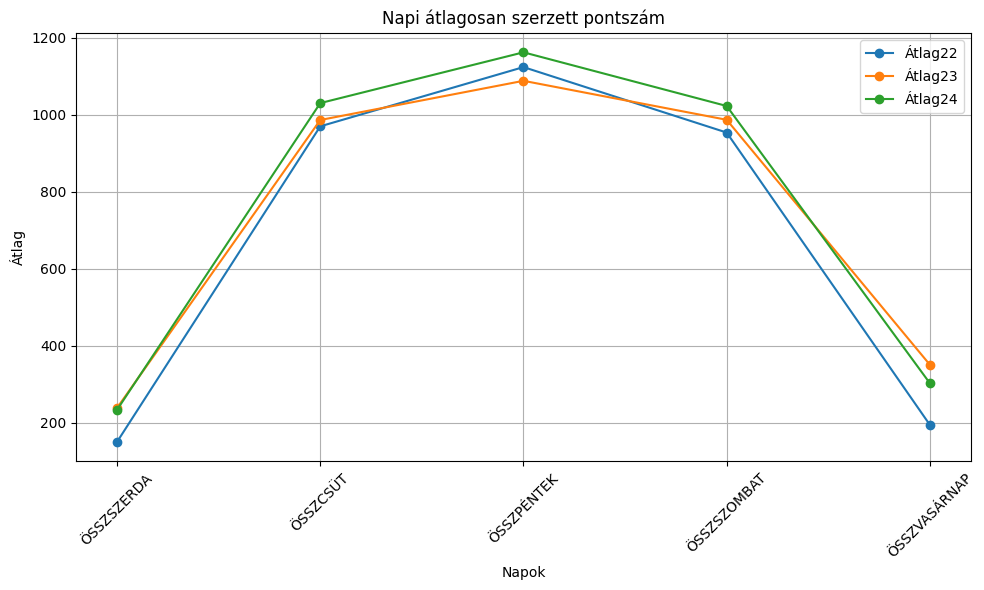

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

for column in atlag_dn.columns:
    plt.plot(atlag_dn.index, atlag_dn[column], marker='o', label=column)

plt.title('Napi átlagosan szerzett pontszám')
plt.xlabel('Napok')
plt.ylabel('Átlag')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

pénteken kiemelkedően több pontot szereztek átlagosan a csapatok mindhárom évben

In [120]:
atlag_dn2 =atlag_dn.T

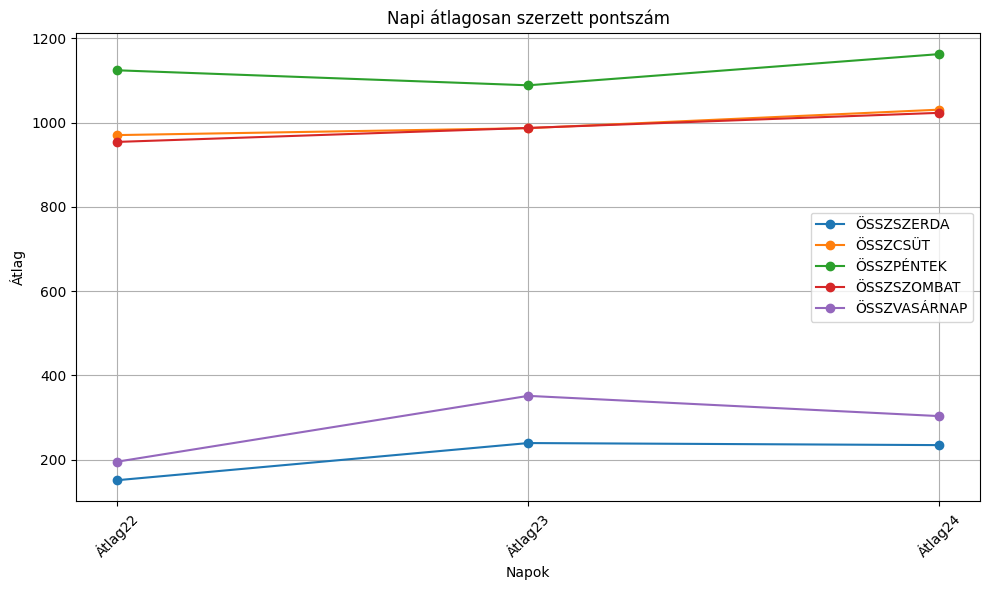

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

for column in atlag_dn2.columns:
    plt.plot(atlag_dn2.index, atlag_dn2[column], marker='o', label=column)

plt.title('Napi átlagosan szerzett pontszám')
plt.xlabel('Napok')
plt.ylabel('Átlag')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

szombaton és csütörtökön átlagosan ugyanannyi pontot szereztek a csapatok, pénteken szerezték a legtöbb pontot

transzponalom azt a tablazatot, amiben a napi atlagpont es a csapatok neve szerepel

In [123]:
df_diaknapok22=df_diaknapok22.T

In [129]:
df_diaknapok23=df_diaknapok23.T

In [130]:
df_diaknapok24=df_diaknapok24.T

In [124]:
df_diaknapok22

CSAPATNÉV,A KOCKA MÁSIK OLDALA,AMITAKARTOK,BASSZHATTYÚK,BEER-KA,BEERLUCK,BEEZ-MUTE,BORÁSZOK,BÚVÁRMEDVÉK,CHEEKLOW,CHEEKY-SHARE,...,TEQUILA TIGRISEK,UNI-GUNS,VERBUNK,VÁ$ÖRHELY,WATTAFÁK,WEEDRÁK,WESITHEK,WHATSON,ZSÁKMÁNY,Ű-BEER
ÖSSZSZERDA,54,242,25,127,350,290,90,230,106,137,...,68,342,42,25,208,225,75,120,128,140
ÖSSZCSÜT,965,1217,851,729,916,1219,924,1285,1249,532,...,876,1215,928,1065,979,1180,1009,1021,815,812
ÖSSZPÉNTEK,1319,1108,699,1152,1218,1345,1104,1261,1342,1032,...,1122,1541,1034,1252,1239,835,1189,1068,1247,1206
ÖSSZSZOMBAT,848,971,734,765,1052,1027,909,1074,1313,854,...,894,1344,1043,1390,889,770,979,695,1130,778
ÖSSZVASÁRNAP,245,302,0,199,92,261,237,199,217,95,...,200,305,101,261,255,215,217,197,243,237


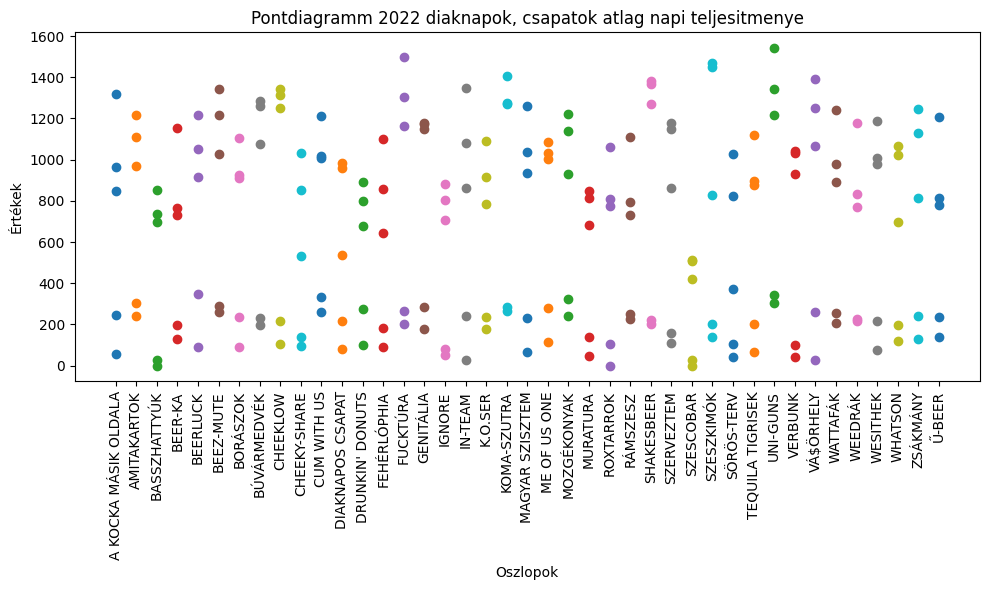

In [150]:
plt.figure(figsize=(10, 6))

for column in df_diaknapok22.columns:
    plt.scatter([column] * len(df_diaknapok22), df_diaknapok22[column], label=column)

plt.title('Pontdiagramm 2022 diaknapok, csapatok atlag napi teljesitmenye')
plt.xlabel('Oszlopok')
plt.ylabel('Értékek')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

az alsó pöttyök a vasárnapot és a szerdát jelölik, amikor a legkevesebb pontot lehet összegyüjteni. látható, hogy általában a csapatok, amelyek ezeken a napokon több pontot szereztek, azok általában a többi napon is jobban teljesítettek.

kivalasztok egy bizonyos csapatot, ennek a napi osszontszamait evekre egyesitem egy tablazatba

In [143]:
ubeer22 = pd.DataFrame(df_diaknapok22['Ű-BEER'])
ubeer22 = ubeer22.rename(columns={'Ű-BEER': 'Ű-BEER22'})

In [144]:
ubeer23 = pd.DataFrame(df_diaknapok23['Ű-BEER'])
ubeer23 = ubeer23.rename(columns={'Ű-BEER': 'Ű-BEER23'})

In [145]:
ubeer24 = pd.DataFrame(df_diaknapok24['Ű-BEER'])
ubeer24 = ubeer24.rename(columns={'Ű-BEER': 'Ű-BEER24'})

In [146]:
ubeer22

,Ű-BEER22
ÖSSZSZERDA,140
ÖSSZCSÜT,812
ÖSSZPÉNTEK,1206
ÖSSZSZOMBAT,778
ÖSSZVASÁRNAP,237


In [182]:
ubeer = pd.concat([ubeer22, ubeer23, ubeer24], axis=1)

In [154]:
ubeer1=ubeer

In [183]:
ubeer

,Ű-BEER22,Ű-BEER23,Ű-BEER24
ÖSSZSZERDA,140,203,238
ÖSSZCSÜT,812,960,954
ÖSSZPÉNTEK,1206,1297,1229
ÖSSZSZOMBAT,778,838,1101
ÖSSZVASÁRNAP,237,400,431


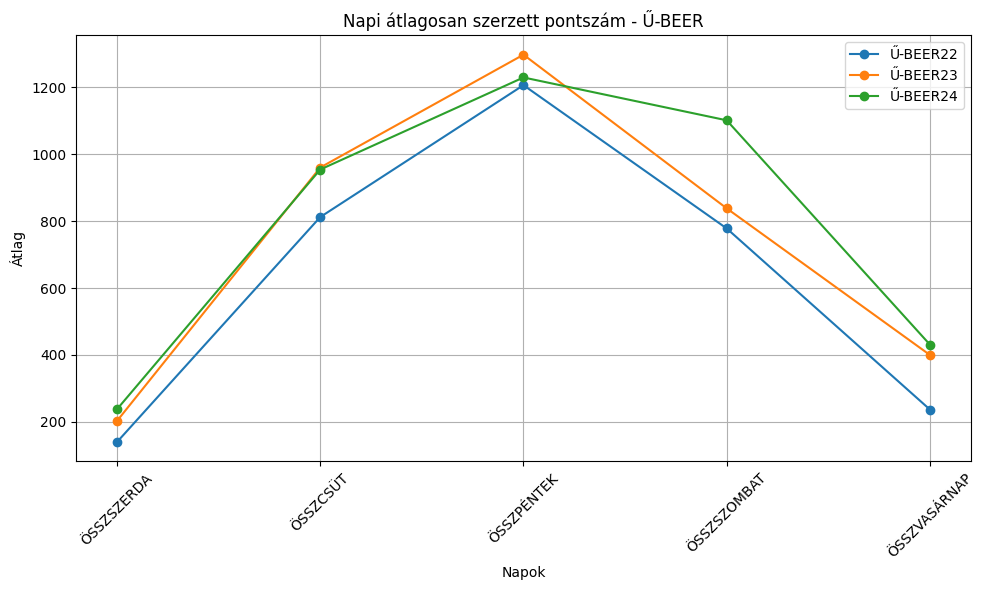

In [152]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

for column in ubeer.columns:
    plt.plot(ubeer.index, ubeer[column], marker='o', label=column)

plt.title('Napi átlagosan szerzett pontszám - Ű-BEER')
plt.xlabel('Napok')
plt.ylabel('Átlag')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A többi évhez képest a szombati napon a csapat túlteljesítette magát pontszerzésben.

egyesitem az osszes csapat napi atlagos pontszamat az U-beer csapat napi atlagos pontszamaval

In [184]:
ubeer2 = pd.concat([ubeer, atlag_dn], axis=1)

In [185]:
ubeer2

,Ű-BEER22,Ű-BEER23,Ű-BEER24,Átlag22,Átlag23,Átlag24
ÖSSZSZERDA,140,203,238,150.926829,239.121951,234.243902
ÖSSZCSÜT,812,960,954,970.512195,986.951220,1030.853659
ÖSSZPÉNTEK,1206,1297,1229,1124.365854,1088.731707,1162.756098
ÖSSZSZOMBAT,778,838,1101,954.317073,987.487805,1023.317073
ÖSSZVASÁRNAP,237,400,431,195.000000,351.195122,303.170732


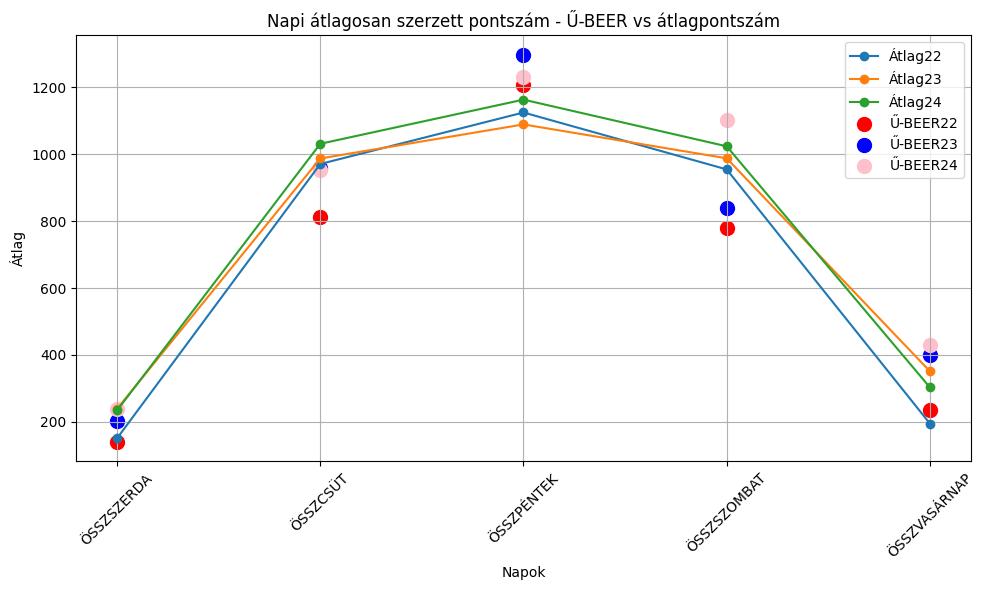

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(ubeer2.index, ubeer2['Átlag22'], marker='o', label='Átlag22')
plt.plot(ubeer2.index, ubeer2['Átlag23'], marker='o', label='Átlag23')
plt.plot(ubeer2.index, ubeer2['Átlag24'], marker='o', label='Átlag24')
plt.scatter(ubeer2.index, ubeer2['Ű-BEER22'], color='red', label='Ű-BEER22', s=100)  # Nagyobb pontok
plt.scatter(ubeer2.index, ubeer2['Ű-BEER23'], color='blue', label='Ű-BEER23', s=100)  # Nagyobb pontok
plt.scatter(ubeer2.index, ubeer2['Ű-BEER24'], color='pink', label='Ű-BEER24', s=100)  # Nagyobb pontok

plt.title('Napi átlagosan szerzett pontszám - Ű-BEER vs átlagpontszám')
plt.xlabel('Napok')
plt.ylabel('Átlag')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Látható hogy az Ű-beer, azon a napon, amelyen a csapatok átlagosan a legtöbb pontot szerezték, azaz pénteken, minden évben az átlag felett teljesített.

In [153]:
ubeer.to_excel('ubeer.xlsx')

In [159]:
ubeer1 = pd.read_excel('ubeer.xlsx')

In [163]:
ubeer1 = ubeer1.rename(columns={'Unnamed: 0': 'nap'})

In [164]:
ubeer1

,nap,Ű-BEER22,Ű-BEER23,Ű-BEER24
0,ÖSSZSZERDA,140,203,238
1,ÖSSZCSÜT,812,960,954
2,ÖSSZPÉNTEK,1206,1297,1229
3,ÖSSZSZOMBAT,778,838,1101
4,ÖSSZVASÁRNAP,237,400,431


felugyelt gepi tanulasi modell

bizonyos csapatra

In [166]:
X = ubeer1.drop('nap', axis=1)
y = X['Ű-BEER24']
X = X.drop('Ű-BEER24', axis=1) #prediktlando oszlopok elhagyasa

In [169]:
X.shape, y.shape

((5, 2), (5,))

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
modell = RandomForestRegressor(100)
modell.fit(X, y)

yfit = modell.predict(X)

In [172]:
df_y = pd.DataFrame(y)
df_y['Ű-BEER24 PREDIKT'] = yfit

<Axes: >

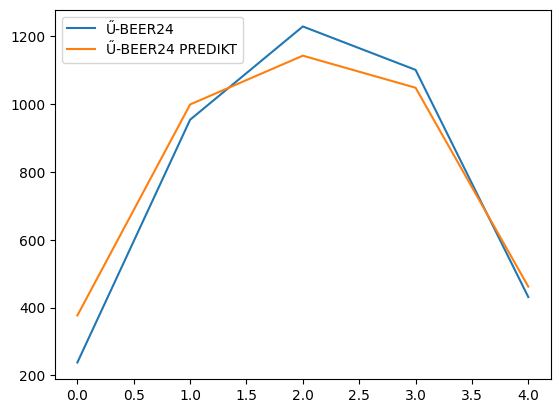

In [173]:
df_y.plot()

In [174]:
import numpy as np

In [175]:
((df_y['Ű-BEER24']**2-df_y['Ű-BEER24 PREDIKT']**2).mean())**(1/2)

152.8974143666271

In [176]:
from sklearn.metrics import mean_squared_error
(mean_squared_error(y,yfit))**(1/2)

80.52480785447429

altalanosan

In [195]:
atlag_dn.to_excel('atlagdn.xlsx')

In [196]:
atlagdn = pd.read_excel('atlagdn.xlsx')

In [197]:
atlagdn

,Unnamed: 0,Átlag22,Átlag23,Átlag24
0,ÖSSZSZERDA,150.926829,239.121951,234.243902
1,ÖSSZCSÜT,970.512195,986.951220,1030.853659
2,ÖSSZPÉNTEK,1124.365854,1088.731707,1162.756098
3,ÖSSZSZOMBAT,954.317073,987.487805,1023.317073
4,ÖSSZVASÁRNAP,195.000000,351.195122,303.170732


In [198]:
X = atlagdn.drop('Unnamed: 0', axis=1)
y = X['Átlag24']
X = X.drop('Átlag24', axis=1) #prediktlando oszlopok elhagyasa

In [199]:
modell = RandomForestRegressor(100)
modell.fit(X, y)

yfit = modell.predict(X)

In [201]:
df_y = pd.DataFrame(y)
df_y['ATLAG PREDIKT'] = yfit

<Axes: >

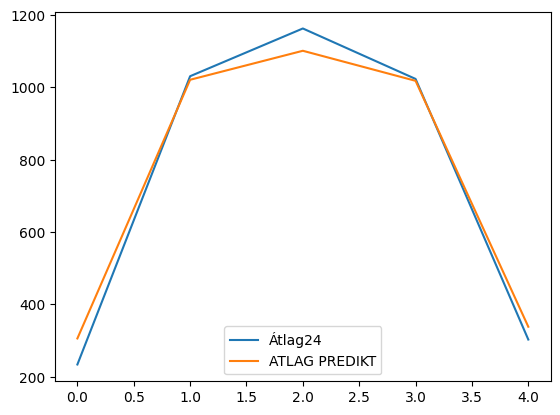

In [202]:
df_y.plot()

In [203]:
((df_y['Átlag24']**2-df_y['ATLAG PREDIKT']**2).mean())**(1/2)

147.53063554062877

In [204]:
from sklearn.metrics import mean_squared_error
(mean_squared_error(y,yfit))**(1/2)

45.49402092426227

Felügyelt tanulási modell következtetés: a modell nagyobb eltérést mutat pontokban, ha csak egy csapat átlagos eredményeit nézzük a 3 évre, napokra lebontva, mint amikor összesített, minden csapat átlagpontszámát prediktáltam. Szinte feleannyi a pontszám hibaaránya

In [206]:
df_diaknapok24=df_diaknapok24.T
df_diaknapok23=df_diaknapok23.T
df_diaknapok22=df_diaknapok22.T

In [207]:
df_diaknapok22

,ÖSSZSZERDA,ÖSSZCSÜT,ÖSSZPÉNTEK,ÖSSZSZOMBAT,ÖSSZVASÁRNAP
CSAPATNÉV,,,,,
A KOCKA MÁSIK OLDALA,54,965,1319,848,245
AMITAKARTOK,242,1217,1108,971,302
BASSZHATTYÚK,25,851,699,734,0
BEER-KA,127,729,1152,765,199
BEERLUCK,350,916,1218,1052,92
BEEZ-MUTE,290,1219,1345,1027,261
BORÁSZOK,90,924,1104,909,237
BÚVÁRMEDVÉK,230,1285,1261,1074,199
CHEEKLOW,106,1249,1342,1313,217


In [208]:
df_diaknapok22 = df_diaknapok22.rename(columns={'ÖSSZSZERDA': 'ÖSSZSZERDA22'})
df_diaknapok22 = df_diaknapok22.rename(columns={'ÖSSZCSÜT': 'ÖSSZCSÜT22'})
df_diaknapok22 = df_diaknapok22.rename(columns={'ÖSSZPÉNTEK': 'ÖSSZPÉNTEK22'})
df_diaknapok22 = df_diaknapok22.rename(columns={'ÖSSZSZOMBAT': 'ÖSSZSZOMBAT22'})
df_diaknapok22 = df_diaknapok22.rename(columns={'ÖSSZVASÁRNAP': 'ÖSSZVASÁRNAP22'})

df_diaknapok23 = df_diaknapok23.rename(columns={'ÖSSZSZERDA': 'ÖSSZSZERDA23'})
df_diaknapok23 = df_diaknapok23.rename(columns={'ÖSSZCSÜT': 'ÖSSZCSÜT23'})
df_diaknapok23 = df_diaknapok23.rename(columns={'ÖSSZPÉNTEK': 'ÖSSZPÉNTEK23'})
df_diaknapok23 = df_diaknapok23.rename(columns={'ÖSSZSZOMBAT': 'ÖSSZSZOMBAT23'})
df_diaknapok23 = df_diaknapok23.rename(columns={'ÖSSZVASÁRNAP': 'ÖSSZVASÁRNAP23'})

df_diaknapok24 = df_diaknapok24.rename(columns={'ÖSSZSZERDA': 'ÖSSZSZERDA24'})
df_diaknapok24 = df_diaknapok24.rename(columns={'ÖSSZCSÜT': 'ÖSSZCSÜT24'})
df_diaknapok24 = df_diaknapok24.rename(columns={'ÖSSZPÉNTEK': 'ÖSSZPÉNTEK24'})
df_diaknapok24 = df_diaknapok24.rename(columns={'ÖSSZSZOMBAT': 'ÖSSZSZOMBAT24'})
df_diaknapok24 = df_diaknapok24.rename(columns={'ÖSSZVASÁRNAP': 'ÖSSZVASÁRNAP24'})

In [209]:
diaknap = pd.concat([df_diaknapok22, df_diaknapok23, df_diaknapok24], axis = 1)

In [212]:
diaknap1 = diaknap.T

In [220]:
diaknap1.to_excel('diaknap1.xlsx')

In [227]:
diaknap1 = pd.read_excel('diaknap1.xlsx')

In [228]:
diaknap1 = diaknap1.rename(columns={'Unnamed: 0': 'NAP'})

In [234]:
diaknap1

,NAP,A KOCKA MÁSIK OLDALA,AMITAKARTOK,BASSZHATTYÚK,BEER-KA,BEERLUCK,BEEZ-MUTE,BORÁSZOK,BÚVÁRMEDVÉK,CHEEKLOW,...,TEQUILA TIGRISEK,UNI-GUNS,VERBUNK,VÁ$ÖRHELY,WATTAFÁK,WEEDRÁK,WESITHEK,WHATSON,ZSÁKMÁNY,Ű-BEER
0,2,54,242,25,127,350,290,90,230,106,...,68,342,42,25,208,225,75,120,128,140
1,0,965,1217,851,729,916,1219,924,1285,1249,...,876,1215,928,1065,979,1180,1009,1021,815,812
2,1,1319,1108,699,1152,1218,1345,1104,1261,1342,...,1122,1541,1034,1252,1239,835,1189,1068,1247,1206
3,3,848,971,734,765,1052,1027,909,1074,1313,...,894,1344,1043,1390,889,770,979,695,1130,778
4,4,245,302,0,199,92,261,237,199,217,...,200,305,101,261,255,215,217,197,243,237
5,2,225,268,180,185,325,343,146,325,266,...,290,340,208,340,313,95,333,126,236,203
6,0,991,871,850,767,1090,1303,811,981,1085,...,740,1193,933,1515,760,966,853,1018,1093,960
7,1,1090,859,936,883,1327,1258,1240,1212,1335,...,1078,1287,1011,1150,1197,1025,1179,1317,1184,1297
8,3,1130,506,932,820,1061,1295,733,1270,1056,...,787,1283,959,1135,1008,765,793,757,1092,838
9,4,402,307,180,294,466,506,397,362,435,...,406,382,213,466,444,433,377,395,362,400


In [229]:
diaknap1['NAP'] = diaknap1['NAP'].str[:-2]

In [233]:
diaknap1['NAP'] = diaknap1.groupby('NAP').ngroup()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
<ipython-input-242-49d3ed0766cb>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  kwargs = dict(cmap=plt.cm.get_cmap("rainbow", 10), edgecolor="none", alpha=0.6)


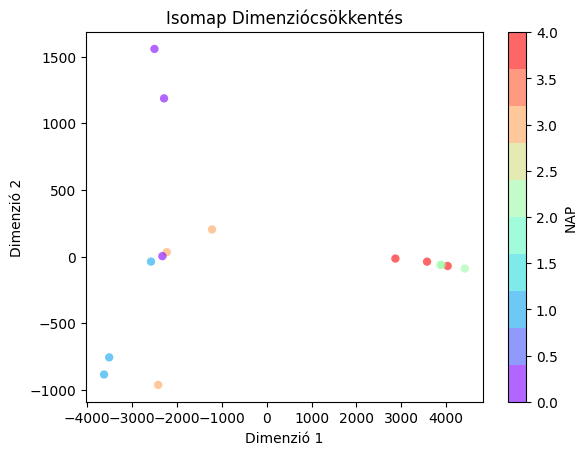

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

# Az Isomap modell definiálása és illesztése az adatokra
modell = Isomap(n_components=2)
modell.fit(diaknap1)

# Az adatok átalakítása az Isomap által tanult térbe
X2_ISO = modell.transform(diaknap1)

# Színezési beállítások definiálása
kwargs = dict(cmap=plt.cm.get_cmap("rainbow", 10), edgecolor="none", alpha=0.6)

# Adatok megjelenítése scatter ploton az Isomap által csökkentett dimenziókban
plt.scatter(X2_ISO[:, 0], X2_ISO[:, 1],c=diaknap1['NAP'],  **kwargs)

# Plot címének hozzáadása
plt.title("Isomap Dimenziócsökkentés")

# X és Y tengely címkék hozzáadása
plt.xlabel("Dimenzió 1")
plt.ylabel("Dimenzió 2")
plt.colorbar(label='NAP')
# Plot megjelenítése
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


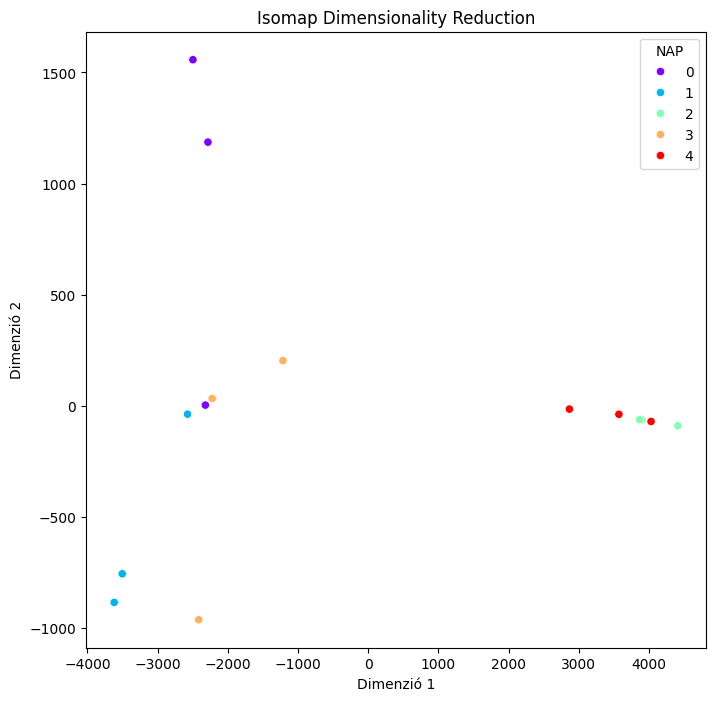

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
import seaborn as sns


# Assume that 'NAP' is the target variable and exclude it from the features for Isomap
features = diaknap1.drop(columns=['NAP'])
target = diaknap1['NAP']

# Perform Isomap
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(features)

# Create a DataFrame for the results
isomap_df = pd.DataFrame(isomap_result, columns=['Dim1', 'Dim2'])
isomap_df['NAP'] = target

# Plot the Isomap result
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Dim1', y='Dim2', hue='NAP', palette='rainbow', data=isomap_df)
#plt.colorbar(label='NAP')
plt.title('Isomap Dimensionality Reduction')
plt.xlabel('Dimenzió 1')
plt.ylabel('Dimenzió 2')
plt.show()


In [255]:
df_transposed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
NAP,2,0,1,3,4,2,0,1,3,4,2,0,1,3,4
A KOCKA MÁSIK OLDALA,54,965,1319,848,245,225,991,1090,1130,402,270,887,1185,986,434
AMITAKARTOK,242,1217,1108,971,302,268,871,859,506,307,167,1041,1014,599,292
BASSZHATTYÚK,25,851,699,734,0,180,850,936,932,180,170,912,1115,931,248
BEER-KA,127,729,1152,765,199,185,767,883,820,294,221,1122,1287,966,320
BEERLUCK,350,916,1218,1052,92,325,1090,1327,1061,466,308,1093,1063,988,347
BEEZ-MUTE,290,1219,1345,1027,261,343,1303,1258,1295,506,334,1329,1180,1104,427
BORÁSZOK,90,924,1104,909,237,146,811,1240,733,397,242,947,1094,897,118
BÚVÁRMEDVÉK,230,1285,1261,1074,199,325,981,1212,1270,362,233,1104,1265,984,272
CHEEKLOW,106,1249,1342,1313,217,266,1085,1335,1056,435,306,1142,1382,1310,421


**Végső következtetés:** A napok, amelyeken a legkevesebb pontot szereztek általában a csapatok, azok a szerda és a vasárnap. Hasonlóan sok pontot szereztek átlagosan csütörtökön és szombaton, a csúcspont pedig pénteken volt. Viszont nem elegendő csak a sok pontot érő napokra koncentrálni, hiszen sok esetben kevés pont tesz különbséget két csapat helyezése között, így azok a csapatok teljesítenek jobban, akik a diáknapok teljes ideje alatt odateszik magukat, nem csak bizonyos dolgokra készülnek.